<a href="https://colab.research.google.com/github/laurabrin/EDALabs/blob/main/EDA_Lab_4_LBrin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4: Data Encoding, Outliers & Imbalanced Data

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Seaborn is a great visualization library. You may need to install it using 'pip install seaborn'
import seaborn as sns

## Lab Activity One: Feature encoding

In this activity, you will be converting categorical text data into categorical numeric. This is done using the method called one-hot encoding. New columns are created for each category and its given binary values ($0$ or $1$) for if that entity belongs to that category or not. 

In [8]:
df = pd.read_csv("df_1_lab_4.csv")
df = df.drop(columns=['Unnamed: 0'])
df.head(5)

,Gender,Age,M1,Mode,Q,DD,Diagnosis,R1,R3
0,female,56.0,5.316955,c,102.653987,-0.177034,negative,0.079601,0.542921
1,female,6.0,4.302905,e,111.518198,5.969760,negative,0.079601,0.542921
2,male,9.0,5.507547,f,135.896026,0.413635,positive,0.079601,0.542921
3,male,14.0,6.448012,f,128.588020,-1.342695,positive,0.079601,0.542921
4,female,77.0,5.525742,f,95.353828,1.536639,positive,0.453140,9.218762


In [9]:
df.dtypes

Gender        object
Age          float64
M1           float64
Mode          object
Q            float64
DD           float64
Diagnosis     object
R1           float64
R3           float64
dtype: object

### Converting text categorical to numeric categories

The `.get_dumies()` function from pandas is extremely helpful for this. It will encode the specified categorical feature into binary classifications and produce new features accordingly.

##### [A] Use the `.get_dummies()` function on the `'Mode'` column to apply one-hot encoding method.

In [10]:
df_encode = pd.get_dummies(df, columns=["Mode"], prefix='Mode')
df_encode.head(5)

,Gender,Age,M1,Q,DD,Diagnosis,R1,R3,Mode_a,Mode_b,Mode_c,Mode_d,Mode_e,Mode_f,Mode_g,Mode_h,Mode_missing
0,female,56.0,5.316955,102.653987,-0.177034,negative,0.079601,0.542921,0,0,1,0,0,0,0,0,0
1,female,6.0,4.302905,111.518198,5.969760,negative,0.079601,0.542921,0,0,0,0,1,0,0,0,0
2,male,9.0,5.507547,135.896026,0.413635,positive,0.079601,0.542921,0,0,0,0,0,1,0,0,0
3,male,14.0,6.448012,128.588020,-1.342695,positive,0.079601,0.542921,0,0,0,0,0,1,0,0,0
4,female,77.0,5.525742,95.353828,1.536639,positive,0.453140,9.218762,0,0,0,0,0,1,0,0,0


##### [A] Use the `.get_dummies()` function on the `'Mode'` column to apply dummy variable method. 

In [11]:
df_encode = pd.get_dummies(df, columns=["Mode"], prefix='Mode', drop_first = True)
df_encode.head(5)

,Gender,Age,M1,Q,DD,Diagnosis,R1,R3,Mode_b,Mode_c,Mode_d,Mode_e,Mode_f,Mode_g,Mode_h,Mode_missing
0,female,56.0,5.316955,102.653987,-0.177034,negative,0.079601,0.542921,0,1,0,0,0,0,0,0
1,female,6.0,4.302905,111.518198,5.969760,negative,0.079601,0.542921,0,0,0,1,0,0,0,0
2,male,9.0,5.507547,135.896026,0.413635,positive,0.079601,0.542921,0,0,0,0,1,0,0,0
3,male,14.0,6.448012,128.588020,-1.342695,positive,0.079601,0.542921,0,0,0,0,1,0,0,0
4,female,77.0,5.525742,95.353828,1.536639,positive,0.453140,9.218762,0,0,0,0,1,0,0,0


##### [A] Use the `.get_dummies()` function on the `'Gender'` column of the updated dataframe. 

Note that this column already has binary classification for the feature, so it may simply assign $0$ to female and $1$ to male.

In [12]:
df_encode = pd.get_dummies(df_encode, columns=["Gender"], prefix='Gender',drop_first = True)
df_encode.head(5)

,Age,M1,Q,DD,Diagnosis,R1,R3,Mode_b,Mode_c,Mode_d,Mode_e,Mode_f,Mode_g,Mode_h,Mode_missing,Gender_male
0,56.0,5.316955,102.653987,-0.177034,negative,0.079601,0.542921,0,1,0,0,0,0,0,0,0
1,6.0,4.302905,111.518198,5.969760,negative,0.079601,0.542921,0,0,0,1,0,0,0,0,0
2,9.0,5.507547,135.896026,0.413635,positive,0.079601,0.542921,0,0,0,0,1,0,0,0,1
3,14.0,6.448012,128.588020,-1.342695,positive,0.079601,0.542921,0,0,0,0,1,0,0,0,1
4,77.0,5.525742,95.353828,1.536639,positive,0.453140,9.218762,0,0,0,0,1,0,0,0,0


##### [A] Use the `.get_dummies()` function on the `'Diagnosis'` column. 

In [13]:
df_encode = pd.get_dummies(df_encode, columns=["Diagnosis"], prefix='Diag',drop_first = True)
df_encode.head(5)

,Age,M1,Q,DD,R1,R3,Mode_b,Mode_c,Mode_d,Mode_e,Mode_f,Mode_g,Mode_h,Mode_missing,Gender_male,Diag_positive
0,56.0,5.316955,102.653987,-0.177034,0.079601,0.542921,0,1,0,0,0,0,0,0,0,0
1,6.0,4.302905,111.518198,5.969760,0.079601,0.542921,0,0,0,1,0,0,0,0,0,0
2,9.0,5.507547,135.896026,0.413635,0.079601,0.542921,0,0,0,0,1,0,0,0,1,1
3,14.0,6.448012,128.588020,-1.342695,0.079601,0.542921,0,0,0,0,1,0,0,0,1,1
4,77.0,5.525742,95.353828,1.536639,0.453140,9.218762,0,0,0,0,1,0,0,0,0,1


##### [A] Observe the datatypes for your dataframe.

In [14]:
df_encode.dtypes

Age              float64
M1               float64
Q                float64
DD               float64
R1               float64
R3               float64
Mode_b             uint8
Mode_c             uint8
Mode_d             uint8
Mode_e             uint8
Mode_f             uint8
Mode_g             uint8
Mode_h             uint8
Mode_missing       uint8
Gender_male        uint8
Diag_positive      uint8
dtype: object

## Lab Activity Two: Outliers

Outliers can affect the performance of a model. Knowing the feature which contains outliers can be significantly beneficial. For example, if a dataset contains the feature 'age' of humans, then a datapoint with `age=`$150$ is an outlier. We know that this is not possible and is clearly an outlier(incorrect data entry in this case). To solve this issue, you can delete all the rows with `age >`$110$ ($110$ is a more reasonable upper limit of human age).

Another way of detecting outliers is to plot the features on a graph to visualize the data points.

In [15]:
import sklearn
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')


#We are loading a preinstalled dataset in the sklearn library. You will come across this in your Machine Learning course. 
boston_data = load_boston()
boston_df = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)

In [16]:
#Observing the prepared dataframe
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


##### [A] A boxplot organizes and splits the data into percentiles and helps to identity outliers. Using the [`seaborn`]((https://seaborn.pydata.org/generated/seaborn.boxplot.html)) library plot a boxplot of the `'RM'` feature. 

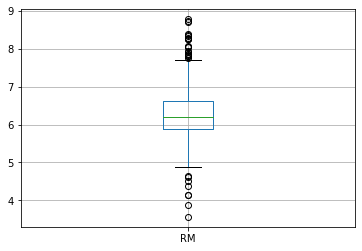

In [17]:
boston_df.boxplot(column="RM")


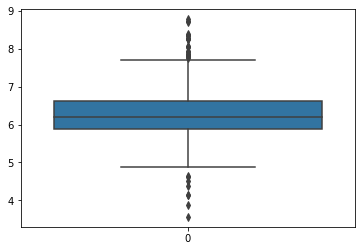

In [18]:
sns.boxplot(data=boston_df["RM"])

##### [A] Briefly list and discuss some other methods that can be used to find outliers in your data

## Lab Activity Three: Imbalanced Datasets

Having an imbalanced dataset can cause affect the performance of your ML model. Below you will see examples of this problem and how you can fix it.

In [19]:
#Loading Data
df_2 = pd.read_csv('creditcard.csv')

**The credit card fraud detection data is a very popular dataset used in the ML space. As you can see below the quantity of the 2 classes has a significant difference.**
- $0$ means there is no fraud 
- $1$ means fraud

In [20]:
df_2['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [21]:
df_2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


##### Visualizing this can show how a ML model will bias non-fraudulent cases.

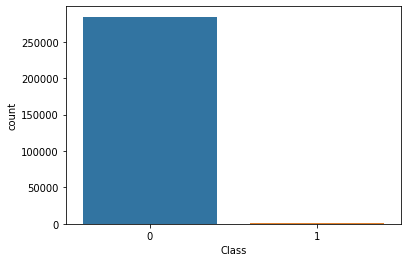

In [22]:
comparing_classes = sns.countplot(df_2['Class'])

##### Two ways of dealing with the imbalanced class issue would be:
1) Forcefully balance the classes. Since its a binary classification problem ($0$ or $1$) a balanced dataset would be 50% $0$ and 50% $1$.
    - **Oversampling** - *Increase* the data of the minority class.
    - **Undersampling** - *Decrease* the data of the majority class.
2) Use non-linear analysis approaches such as Decision Trees and/or Random Forest.

#### Hints: 

1. Use .sample() function to do oversampling. Read the documnetaiton of this function to use it properly. 

2. To add two dataframe together. concat() fucntion will be used. 

##### [A] Perform oversampling of the dataset and create a new dataframe with balanced classes (using oversampling).

In [74]:
over_df=df_2.query("Class==1").sample(frac=500,replace=True, random_state=45)

In [76]:
new_over_df=pd.concat([df_2,over_df])

In [78]:
new_over_df['Class'].value_counts()

0    284315
1    246492
Name: Class, dtype: int64

##### [A] Plot a bar graph of the classes for the new oversampled dataframe.

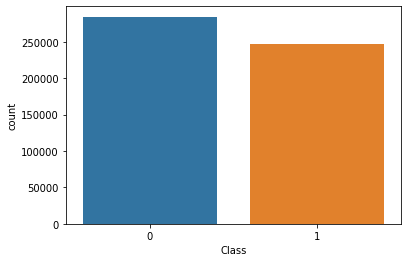

In [79]:
figure_over = sns.countplot(new_over_df['Class'])

##### [A] Discuss the disadvantages of oversampling

Oversampling can help address overfitting by creating more data to fit the model with. It can be useful in datasets with minority classes to address imbalance. 
The oversampling method used here can not be recommended as it is simply duplicating the data with low counts, which in itself is going to create overfitting. Using a statistical method like SMOTE would be benificial if you are trying to create synthetic data that may still have meaningful results in ML models.

Besides creating overfitting, synthetic data may result in very inaccurate new data being entered into the model

##### [A] Perform undersampling of the `df_2` dataset and create a new dataframe with balanced classes (using undersampling). Display new class counts of your new dataframe using a bar graph.

In [114]:
under_df=df_2.query("Class==0").sample(frac=0.0018,replace=True, random_state=45)
under_df_class2=df_2[df_2["Class"]==1]

In [115]:
new_under_df=pd.concat([under_df,under_df_class2])

In [116]:
new_under_df['Class'].value_counts()

0    512
1    492
Name: Class, dtype: int64

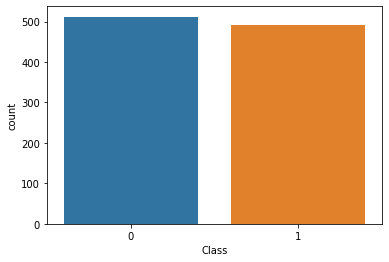

In [117]:
figure_under = sns.countplot(new_under_df['Class'])

##### [A] Discuss the disadvantages of undersampling

One of the advantages of undersampling is that all of the data being used belongs to the original data set and can create a model that does not skew towards the majority class. It can also be useful when you have more data than necessary and want to reduce storage and processing time.

Depending on how the undersamping is performed there can be serious risks of under representing or eliminating certain features in the data. This could result in bias in the majority class. There is also a significant loss of the original dataset. Again, this method is not as productive as a statisical method that can account for reasoning/rationale. Condended nearest neighbours (CNN), edited nearest neighbour (ENN) and Tomek Links methods can help selectivly undersample. (https://www.mastersindatascience.org/learning/statistics-data-science/undersampling/)